In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-47.67670017578528 77.27532617445718
85.32908883569911 -41.16155862111836
-75.2191259753369 -142.9942510590416
20.721230111303825 121.90758251478564
-85.13546919092391 -148.42095251639026
-78.78855982003462 124.23530641768025
-5.0349484647798874 133.11490760691555
-11.92065898989506 123.61853231833442
79.92463735542461 18.46606615655091
17.67831040636551 172.76017456382374
12.288632192336408 13.626282924837568
38.9180979081591 134.42050502389276
-76.38877637197933 21.10064546148999
-25.34263574902468 52.77246115078674
-5.774584043758779 -65.64130185760429
-52.583310096074335 61.4321884950447
70.33152105158607 -62.7726980131968
-21.676431762066983 30.653598012482433
38.00379690801404 85.81239524749805
-29.050084539898528 152.4996048409123
-34.571586415040606 -70.28604786650483
40.092860782580374 -144.3080629665412
-52.74039229463057 14.7367826921014
-68.06262796854635 -21.26509942283886
-69.7904447711727 7.9347991246460765
-87.71991621625834 -7.018826868814955
-67.85092105312029 -114.83

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | basco
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | kupang
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | maiduguri
Processing Record 11 of Set 1 | wajima
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | canutama
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | beitbridge
Processing Record 18 of Set 1 | korla
Processing Record 19 of Set 1 | casino
Processing Record 20 of Set 1 | machali
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | hermanus
Processing Recor

Processing Record 40 of Set 4 | pathein
Processing Record 41 of Set 4 | veraval
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | sault sainte marie
Processing Record 44 of Set 4 | arlit
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | prince rupert
Processing Record 48 of Set 4 | yomitan
City not found. Skipping...
Processing Record 49 of Set 4 | bouca
Processing Record 50 of Set 4 | jiaozuo
Processing Record 1 of Set 5 | oussouye
Processing Record 2 of Set 5 | oistins
Processing Record 3 of Set 5 | marawi
Processing Record 4 of Set 5 | zhanaozen
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | isla vista
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | inverness
Processing Record 11 of Set 5 | zhoucheng
Processi

Processing Record 25 of Set 8 | ndungu
Processing Record 26 of Set 8 | lolua
City not found. Skipping...
Processing Record 27 of Set 8 | riyadh
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | lulea
Processing Record 30 of Set 8 | inhambane
Processing Record 31 of Set 8 | prieska
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | sao gabriel da cachoeira
Processing Record 34 of Set 8 | ustka
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | barabinsk
Processing Record 37 of Set 8 | nemuro
Processing Record 38 of Set 8 | taguatinga
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | coro
Processing Record 41 of Set 8 | general roca
Processing Record 42 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | provideniya
Processing Record 45 of Set 8 | kidal
Processing Record 46 of Set 8 | lasa
Processing Record 47 of Set 8 | vila fran

Processing Record 14 of Set 12 | ostersund
Processing Record 15 of Set 12 | aasiaat
Processing Record 16 of Set 12 | komsomolskiy
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | parsons
Processing Record 19 of Set 12 | pochutla
Processing Record 20 of Set 12 | hailar
Processing Record 21 of Set 12 | tahe
Processing Record 22 of Set 12 | bam
Processing Record 23 of Set 12 | dibaya
City not found. Skipping...
Processing Record 24 of Set 12 | mawlaik
Processing Record 25 of Set 12 | paita
Processing Record 26 of Set 12 | biak
Processing Record 27 of Set 12 | huilong
Processing Record 28 of Set 12 | lixourion
Processing Record 29 of Set 12 | juliaca
Processing Record 30 of Set 12 | ayorou
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | alepe
Processing Record 33 of Set 12 | san martin
Processing Record 34 of Set 12 | bourail
Processing Record 35 of Set 12 | limbang
Processing Record 36 of Set 12 | leshukonskoye
Processing Record 37 of Set

In [10]:
len(cities)

618

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,66.25,88,40,3.44,MU,2022-08-06 03:28:45
1,Ilulissat,69.2167,-51.1000,44.62,87,100,4.61,GL,2022-08-06 03:28:46
2,Mataura,-46.1927,168.8643,57.47,64,69,5.46,NZ,2022-08-06 03:28:46
3,Basco,20.4487,121.9702,84.90,74,11,15.82,PH,2022-08-06 03:28:46
4,New Norfolk,-42.7826,147.0587,47.91,67,62,4.00,AU,2022-08-06 03:27:02
5,Tual,-5.6667,132.7500,78.35,86,100,10.29,ID,2022-08-06 03:28:47
6,Kupang,-10.1667,123.5833,82.31,60,82,9.64,ID,2022-08-06 03:28:47
7,Longyearbyen,78.2186,15.6401,49.84,76,75,2.30,SJ,2022-08-06 03:28:47
8,Butaritari,3.0707,172.7902,82.76,73,78,11.59,KI,2022-08-06 03:27:15
9,Maiduguri,11.8464,13.1603,73.49,84,99,7.63,NG,2022-08-06 03:28:48


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-08-06 03:28:45,-20.4081,57.7000,66.25,88,40,3.44
1,Ilulissat,GL,2022-08-06 03:28:46,69.2167,-51.1000,44.62,87,100,4.61
2,Mataura,NZ,2022-08-06 03:28:46,-46.1927,168.8643,57.47,64,69,5.46
3,Basco,PH,2022-08-06 03:28:46,20.4487,121.9702,84.90,74,11,15.82
4,New Norfolk,AU,2022-08-06 03:27:02,-42.7826,147.0587,47.91,67,62,4.00
5,Tual,ID,2022-08-06 03:28:47,-5.6667,132.7500,78.35,86,100,10.29
6,Kupang,ID,2022-08-06 03:28:47,-10.1667,123.5833,82.31,60,82,9.64
7,Longyearbyen,SJ,2022-08-06 03:28:47,78.2186,15.6401,49.84,76,75,2.30
8,Butaritari,KI,2022-08-06 03:27:15,3.0707,172.7902,82.76,73,78,11.59
9,Maiduguri,NG,2022-08-06 03:28:48,11.8464,13.1603,73.49,84,99,7.63


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

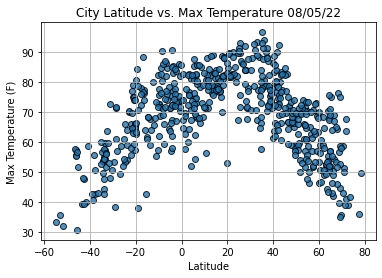

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

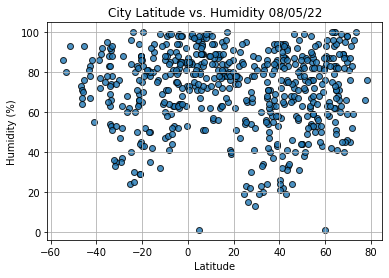

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

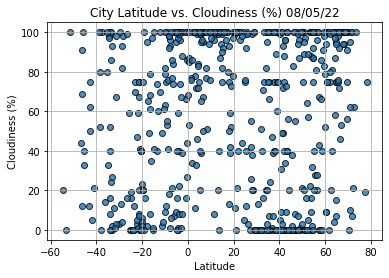

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

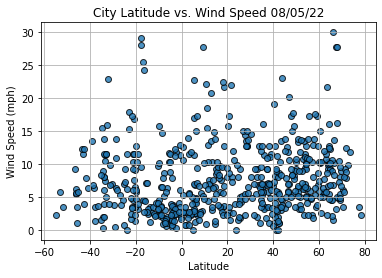

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ilulissat,GL,2022-08-06 03:28:46,69.2167,-51.1000,44.62,87,100,4.61
3,Basco,PH,2022-08-06 03:28:46,20.4487,121.9702,84.90,74,11,15.82
7,Longyearbyen,SJ,2022-08-06 03:28:47,78.2186,15.6401,49.84,76,75,2.30
8,Butaritari,KI,2022-08-06 03:27:15,3.0707,172.7902,82.76,73,78,11.59
9,Maiduguri,NG,2022-08-06 03:28:48,11.8464,13.1603,73.49,84,99,7.63


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

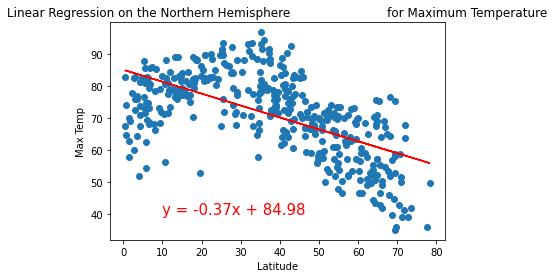

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

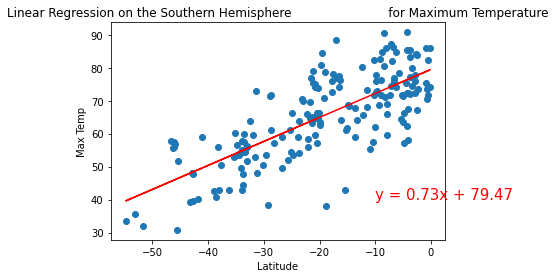

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-10,40))

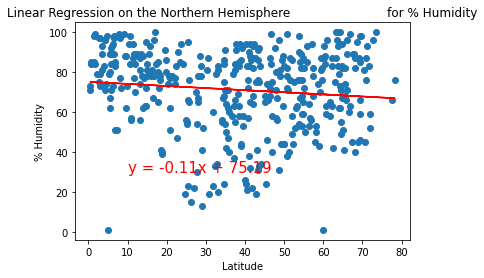

In [26]:
# Linear regression on the Northern Hemisphere % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,30))

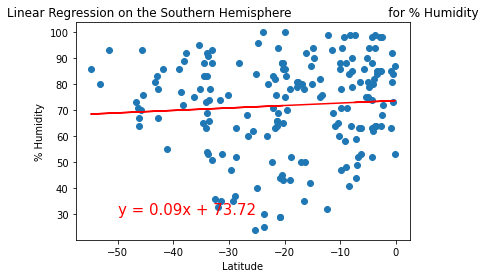

In [27]:
# Linear regression on the Southern Hemisphere % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

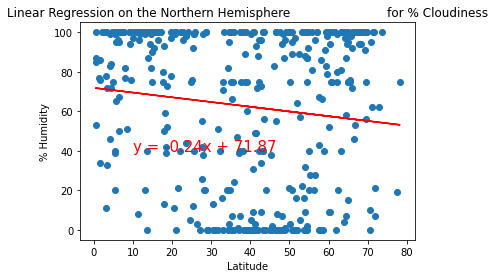

In [28]:
# Linear regression on the Northern Hemisphere % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(10,40))

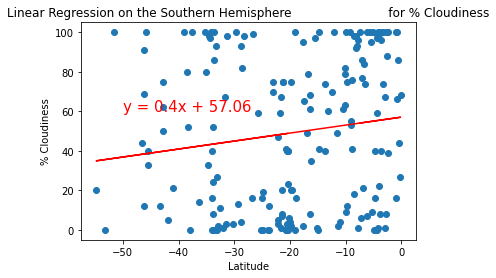

In [29]:
# Linear regression on the Southern Hemisphere % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

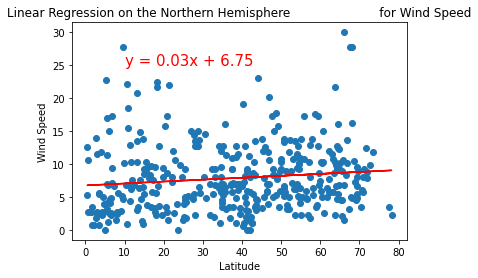

In [30]:
# linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(10,25))

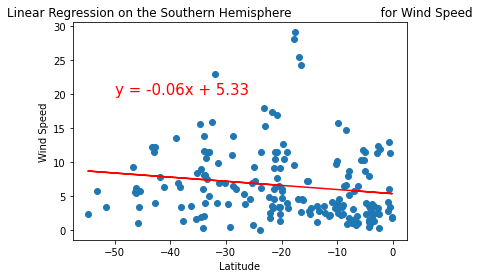

In [31]:
# linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,20))